#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [6]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cse519


In [7]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [9]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"sahithyac","key":"cd7911e591e71cba28276facc1253cda"}'}

In [10]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c optiver-trading-at-the-close
!unzip optiver-trading-at-the-close.zip
!ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
optiver-trading-at-the-close.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  optiver-trading-at-the-close.zip
replace example_test_files/revealed_targets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 example_test_files  'kaggle (4).json'	 optiver-trading-at-the-close.zip
'kaggle (1).json'    'kaggle (5).json'	 public_timeseries_testing_util.py
'kaggle (2).json'     kaggle.json	 train.csv
'kaggle (3).json'     optiver2023


#### Q1: Anomalies and Cleaning, 15 pts


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": np.int,
  "date_id":np.int,
  "seconds_in_bucket":np.int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":np.int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":np.int,
  "row_id": "string",
}
csv = pd.read_csv("train.csv")


<ipython-input-18-ac28b01514d1>:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "stock_id": np.int,
<ipython-input-18-ac28b01514d1>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details a

In [ ]:
csv.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4



### Missing Values
<br>Calculating the number of empty or missing values in a data set is essential so we can determine how many values are what values are missing and clean or pre process the data accordingly. <br>
In this dataset, we are able to observe that about <b> 55% of far_price and near_price data </b> is missing as NASDAQ calculates the far_price and near_price in the latter 5 minutes of the closing auction. <br>
And <b> 220 data points </b>are missing from <b> imbalance_size,  reference_price, matched_size, bid_price, ask_price and wap. </b><br>
<b>88 data points</b> are missing from <b> target</b> variable

In [ ]:
print(csv.isna().sum())

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


### Distribution of data:
In this step, the <b>mean, median and mode</b> for each variable in the data is calculated. From the output, we are able to understand how the distribution or skew of the data is by comparing the mean and the median.<br>
From the output, we are able to understand that <b> reference_price, bid_price, ask_price, wap, far_price, near_price and target </b> variables are <b>not skewed</b>. i.e. Their mean and median are almost the same.<br>
Whereas, the <b> imbalance_size, matched_size, bid_size and ask_size </b> are skewed. i.e there is a difference between their mean and the median. <br>
One possible explanation for this skewness is that the bid_size is variable that depend upon the buyer and similarly the ask_price is a variable that very heavily depends upon the seller. The range might differ according to the stock, the buyer seller and the stock. Matched_size and imbalance_size are variables that are dependent on the bid_size and ask_size.
<br>


In [ ]:
columns = ['reference_price','bid_price','ask_price','wap','target','imbalance_size','matched_size','bid_size','ask_size']
for col in columns:
    mean = csv[col].mean()
    median = csv[col].median()
    mode = csv[col].mode()
    print(f"Mean of {col}:{mean}")
    print(f"Median of {col}:{median}")
    print(f"Mode of {col}:{mode}\n")

Mean of reference_price:0.9999955386233814
Median of reference_price:0.999967
Mode of reference_price:0    1.0
Name: reference_price, dtype: float64

Mean of bid_price:0.99972629069526
Median of bid_price:0.999728
Mode of bid_price:0    1.0
Name: bid_price, dtype: float64

Mean of ask_price:1.0002644967753378
Median of ask_price:1.000207
Mode of ask_price:0    1.0
Name: ask_price, dtype: float64

Mean of wap:0.999991952552236
Median of wap:0.999997
Mode of wap:0    1.0
Name: wap, dtype: float64

Mean of target:-0.047561245607892856
Median of target:-0.06020069
Mode of target:0   -0.15974
Name: target, dtype: float64

Mean of imbalance_size:5715293.098653004
Median of imbalance_size:1113604.44
Mode of imbalance_size:0    0.0
Name: imbalance_size, dtype: float64

Mean of matched_size:45100245.28441664
Median of matched_size:12882638.559999999
Mode of matched_size:0     20422.34
1     53980.72
2    207578.17
3    256241.39
Name: matched_size, dtype: float64

Mean of bid_size:51813.5928547

In [14]:
columns = ['far_price','near_price']
for col in columns:
    mean = csv[col].mean()
    median = csv[col].median()
    mode = csv[col].mode()
    print(f"Mean of {col}:{mean}")
    print(f"Median of {col}:{median}")
    print(f"Mode of {col}:{mode}\n")

Mean of far_price:1.001712869102652
Median of far_price:0.999883
Mode of far_price:0    1.0
Name: far_price, dtype: float64

Mean of near_price:0.9996601060681288
Median of near_price:0.999889
Mode of near_price:0    1.0
Name: near_price, dtype: float64



### Data Pre-processing:

<br>
<b>Approach 1:</b> Imputing the data set to fill the NaN value with the mean of the variable.<br>Imputing the dataset is a most common method for dealing with missing values. The mean is chosen as we can observe that even after imputing the mean and median of data remains unchanged.

<b> This approach was used for the baseline model and Model 1</b><br>
Imputing the dataset is necessary as it is better than dropping datapoints which might result in loss of important data

In [19]:
df = csv.copy()

In [13]:
del csv

In [14]:
fPriceMean = df['far_price'].mean()
df['far_price'].fillna(fPriceMean, inplace=True)
nPriceMean = df['near_price'].mean()
df['near_price'].fillna(nPriceMean, inplace=True)
df['imbalance_size'].fillna(df['imbalance_size'].mean(), inplace=True)
df['reference_price'].fillna(df['reference_price'].mean(), inplace=True)
df['matched_size'].fillna(df['matched_size'].mean(), inplace=True)
df['bid_price'].fillna(df['bid_price'].mean(), inplace=True)
df['ask_price'].fillna(df['ask_price'].mean(), inplace=True)
df['wap'].fillna(df['wap'].mean(), inplace=True)
df['target'].fillna(df['target'].mean(), inplace=True)
print(df['near_price'].describe())
print(df['far_price'].describe())

count    5.237980e+06
mean     9.996601e-01
std      8.204298e-03
min      7.869880e-01
25%      9.996601e-01
50%      9.996601e-01
75%      9.996601e-01
max      1.309732e+00
Name: near_price, dtype: float64
count    5.237980e+06
mean     1.001713e+00
std      4.825940e-01
min      7.700000e-05
25%      1.000434e+00
50%      1.001713e+00
75%      1.001713e+00
max      4.379531e+02
Name: far_price, dtype: float64


We can observe that in far price, the maximum count is 437.95 while the dat aat the 3rd quartile is 1.00. That is  a huge jump and can be considered an outlier.
To clean this variable of its outliers, we can use z score calculation. Using the z-score method to detect outliers is a straightforward way to identify data points that are far from the mean of the dataset. This method helps us understand which data points deviate significantly from the average, indicating they might be outliers. There were around 78 data points with outliers. Since the far price data ranged from approximately 0.99 to 1.00 for the other records, assume that it is safe to drop these data points.

In [15]:
fPriceStd = df['far_price'].std()
df['far_price_zscore'] = (df['far_price'] - fPriceMean) / fPriceStd
threshold = 3
outliers = df[abs(df['far_price_zscore']) > threshold]
#print(outliers)
df=df.drop(outliers.index)
df['far_price'].describe()

count    5.237902e+06
mean     1.000819e+00
std      1.320061e-02
min      7.700000e-05
25%      1.000434e+00
50%      1.001713e+00
75%      1.001713e+00
max      2.298125e+00
Name: far_price, dtype: float64

<b> Approach 2: </b> Interpolating the data <br>
Interpolation is the method of filling the unknown values using the data that already exists.
Here, we are using interpolation as this is a time series data, assuming that the missing data points should exist somehwere along the linear path.
<br>
In the case of far_price and near_price, since more than 55% of data is missing, we use the "backfill" argument to fill the missing values.<br>
Although this seems like a better way of imputing data, this data did not make much of a differenc ein the models that were built.

In [20]:
df1 = csv.copy()
df1['imbalance_size'].interpolate(method = "linear", inplace=True)
df1['reference_price'].interpolate(method = "linear", inplace=True)
df1['matched_size'].interpolate(method = "linear", inplace=True)
df1['bid_price'].interpolate(method = "linear", inplace=True)
df1['ask_price'].interpolate(method = "linear", inplace=True)
df1['wap'].interpolate(method ="linear",inplace=True)
df1['target'].interpolate(method = "linear",inplace=True)
df1['far_price'].fillna(df['far_price'].mean(),inplace=True)
df1['near_price'].fillna(df['near_price'].mean(),inplace=True)
df1.isna().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

In [19]:
del df1

References:<br>
https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16 <br>
https://itadviser.dev/stock-market-data-normalization-for-time-series/ <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html<br>
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


In [ ]:
cols = ['seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag','reference_price','matched_size','far_price','near_price','bid_price','bid_size','ask_price','ask_size','wap','target']
corr = df[cols].corr(method='pearson')
print(corr)

                         seconds_in_bucket  imbalance_size  \
seconds_in_bucket                 1.000000       -0.123943   
imbalance_size                   -0.123943        1.000000   
imbalance_buy_sell_flag          -0.003640       -0.010159   
reference_price                  -0.000841       -0.003717   
matched_size                      0.068625        0.512367   
far_price                        -0.044712        0.002754   
near_price                        0.005382       -0.009271   
bid_price                         0.014813        0.005691   
bid_size                          0.162866        0.021141   
ask_price                        -0.017832       -0.012774   
ask_size                          0.146337        0.022623   
wap                              -0.001265       -0.003495   
target                           -0.002203       -0.001191   

                         imbalance_buy_sell_flag  reference_price  \
seconds_in_bucket                      -0.003640        -0.000

### Heatmap for visualising the pairs


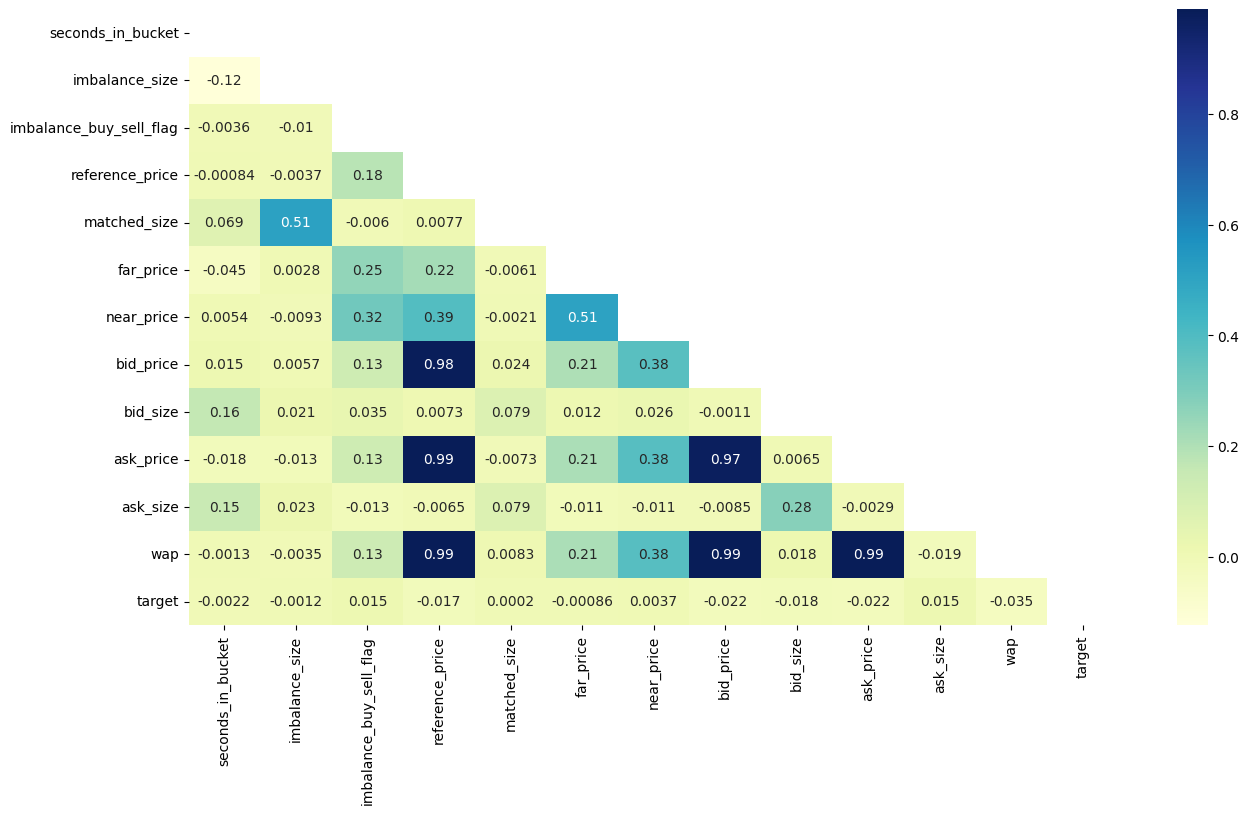

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
matrix = np.triu(corr)
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True,ax = ax,mask = matrix)

References: <br> https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation<br>
https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

### Pairs of variables with high correlation:

<b><U>bid_price and reference_price :</b></u>  In a closing auction, the bid price and reference price are highly correlated. This happens because the reference price acts as a starting point, based on recent trading data or the previous closing price. As traders place their orders during the auction, they often aim to match or get as close as possible to this reference price. This desire to align with the reference price drives the bid prices to hover around this value, making them highly correlated. The auction's goal is to find a fair closing price, and this connection between the bid and reference prices helps ensure a smoother and more orderly end to the day's trading activities.


<br>
<b><U>ask_price and reference_price:</b></u>The ask price and reference price are highly correlated because they both play a significant role in determining a fair value for a security. When people look at the reference price, which is like a benchmark based on past prices, they tend to set their ask prices accordingly. They want to make sure their ask price is not too far off from what others consider as a fair price. This creates a link between the two, as any changes in the reference price often lead to similar shifts in the ask price. <br> <br>
<b><U>wap and reference_price:</b></u>The WAP is calculated by taking the average of the prices of a security throughout a specific period, considering the volume of trades at each price. (i.e) by summing up the products of bid_price and ask_size, ask_price and bid_size and dividing them by the sum of bidsize and asksize. As the ask_price and bid_price and highly correlated variables with reference_price, it explains the high correlation of wap and reference_price.<br><br>
<b><U>bid_price and wap</b></u>,
<b><U>wap and ask_price:</b></u>  WAP is calculated by taking the average of the prices of a security throughout a specific period, considering the volume of trades at each price. (i.e) by summing up the products of bid_prie and ask_size, ask_price and bid_size and dividing them by the sum of bid_size and ask_size. So, as the bid price or the ask price increases or decreases, WAP also increases or decreases respectively.
<br><br>
<b><u>ask_price and bid_price:</b></u> The ask price and bid price are closely linked because they represent the two sides of a transaction. The ask price is what a seller is willing to take for a security, while the bid price is what a buyer is willing to pay. They both reflect the current supply and demand for a particular asset. When there is strong interest in a security, the ask and bid prices tend to move closer together, indicating agreement on the value. This correlation signifies the market's consensus on the fair price and ensures smoother transactions.


References: https://www.sciencedirect.com/science/article/abs/pii/S109499680870015X<br>https://www.investopedia.com/terms/b/bid-and-ask.asp<br>https://www.investopedia.com/articles/investing/091113/auction-method-how-nyse-stock-prices-are-set.asp
https://journals.sagepub.com/doi/10.1509/jmr.09.0334
https://www.investopedia.com/terms/v/vwap.asp#:~:text=Understanding%20the%20Volume%2DWeighted%20Average,by%20the%20total%20shares%20traded.&text=Cumulative%20%3D%20total%20since%20the%20trading%20session%20opened.
https://www.kaggle.com/competitions/optiver-trading-at-the-close/discussion/444516
https://www.kaggle.com/competitions/optiver-trading-at-the-close/discussion/441966



#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



### Calculating the consensus record:
For calculating the consensus record, I selected the features: <b> reference_price, matched_size, wap, near_price and far_price</b><br>
<b>Reference Price:</b> It reflects the optimal point where share pairing is maximized, imbalance is minimized, and distance from the bid-ask midpoint is minimized, serving as a key indicator of stock valuation.

<b>Matched Size:</b> This variable indicates the amount that can be matched at the current reference price, providing essential information about the liquidity and trading volume at that particular price point.

<b>Far Price and Near Price:</b>These prices offer valuable context about the stock's trading patterns and dynamics before the closing auction. They help gauge the stock's behavior over time, providing a reference for understanding the stock's movements relative to its earlier trading activity.

In [21]:
data = df.copy()

In [13]:
del df

In [22]:
def calculate_consensus(group):
    consensus_record = {}
    consensus_record['average_reference_price'] = group['reference_price'].mean()
    consensus_record['average_matched_size'] = group['matched_size'].mean()
    consensus_record['average_wap'] = group['wap'].mean()
    consensus_record['max_near_price'] = group['near_price'].max()
    consensus_record['min_far_price'] = group['far_price'].min()

    return pd.Series(consensus_record, index=consensus_record.keys())
consensus_records = data.groupby(['stock_id', 'date_id']).apply(calculate_consensus)

print(consensus_records)

                  average_reference_price  average_matched_size  average_wap  \
stock_id date_id                                                               
0        0                       0.999664          2.064913e+07     0.999618   
         1                       0.999050          9.342939e+06     0.999000   
         2                       0.998940          1.306975e+07     0.998962   
         3                       0.998883          1.414532e+07     0.998919   
         4                       1.000689          1.882983e+07     1.000755   
...                                   ...                   ...          ...   
199      476                     1.000570          2.089265e+07     1.000444   
         477                     0.997992          1.337857e+07     0.998099   
         478                     1.000950          1.080398e+07     1.000838   
         479                     1.002252          2.773323e+07     1.002288   
         480                     1.00136

### Calculation of distance:

In [23]:
consensus_records_array = consensus_records[['average_reference_price', 'average_wap','max_near_price','min_far_price','average_matched_size']].values
def distance_function(record1, record2):
    return np.linalg.norm(record1 - record2)
distances = []
for i in range(len(consensus_records.index.get_level_values('stock_id'))):
    record1 = np.array([consensus_records_array[i]])
    record2 = np.array([consensus_records_array[(i + 1) % len(consensus_records_array)]])
    distance = distance_function(record1, record2)
    distances.append(distance)
distances_array = np.array(distances)
print((distances_array))


[11306194.27945454  3726809.98818182  1075573.59363636 ...
 16929248.58436365 11907750.80181819  4823656.58927272]


### Autocorrelation using only on feature from the consensus record:<br>
The purpose of this code is to determine whether there is a significant degree of autocorrelation in the market for the average WAP values across different time lags. It evaluates whether the stock prices are influenced by their own past values over the specified time period.<br>

Here, WAP is used as WAP is highly correlated with bid_price, ask_price and bid_size and ask_size. WAP can tell a lot about the trend of the market and the dynamics of the market.

In [ ]:
average_values = data.groupby(['stock_id', 'date_id'])['wap'].mean().reset_index()
autocorrelations = {}
lags = range(-10, 11)
for lag in lags:
    autocorrelations[lag] = consensus_records.groupby('stock_id')['average_wap'].corr(
        consensus_records.groupby('stock_id')['average_wap'].shift(-lag)
    )
print(f"Autocorrelation: {autocorrelations}")

Autocorrelation: {-10: stock_id
0     -0.018673
1      0.027670
2      0.045631
3     -0.031907
4     -0.056264
         ...   
195    0.040960
196   -0.016321
197    0.004036
198    0.069415
199   -0.003256
Name: average_wap, Length: 200, dtype: float64, -9: stock_id
0     -0.006374
1      0.035912
2     -0.008517
3      0.038909
4      0.062611
         ...   
195    0.043663
196   -0.011737
197   -0.002385
198    0.027564
199    0.086173
Name: average_wap, Length: 200, dtype: float64, -8: stock_id
0      0.022504
1      0.015489
2      0.021312
3     -0.028363
4      0.001996
         ...   
195    0.035106
196   -0.010953
197   -0.025141
198    0.020757
199    0.028812
Name: average_wap, Length: 200, dtype: float64, -7: stock_id
0     -0.009352
1      0.003551
2      0.016516
3      0.008003
4     -0.050285
         ...   
195    0.046013
196   -0.024724
197    0.077737
198    0.066725
199   -0.053832
Name: average_wap, Length: 200, dtype: float64, -6: stock_id
0      0.004733
1   

### Autocorrelation using the whole consensus record:

Calculating the autocorrelation for each stock with a lag of range -10 to +10.

In [24]:
autocorrelations = {}
lags = list(range(-10, 11))
for stock_id in consensus_records.index.get_level_values('stock_id').unique():
    stock_distances = distances_array[consensus_records.index.get_level_values('stock_id') == stock_id]
    stock_distances = stock_distances.reshape(-1, 1)
    avg_distances = np.mean(stock_distances, axis=1)
    stock_autocorrelations = [pd.Series(avg_distances).autocorr(lag=lag) for lag in lags]
    autocorrelations[stock_id] = stock_autocorrelations

for stock_id, stock_autocorrelation in autocorrelations.items():
    print(f"Autocorrelation for Stock {stock_id}:")
    for lag, autocorr in zip(lags, stock_autocorrelation):
        print(f"Lag {lag}: {autocorr}")

Autocorrelation for Stock 0:
Lag -10: -0.021157345081983976
Lag -9: -0.025495583610624987
Lag -8: -0.0287910167301086
Lag -7: -0.023751354771538884
Lag -6: -0.045505327597175994
Lag -5: -0.054819733836080686
Lag -4: -0.04906068710991968
Lag -3: -0.04763652293168984
Lag -2: -0.04842281562076324
Lag -1: 0.4405435741234429
Lag 0: 1.0
Lag 1: 0.44054357412344297
Lag 2: -0.04842281562076324
Lag 3: -0.047636522931689844
Lag 4: -0.049060687109919676
Lag 5: -0.05481973383608068
Lag 6: -0.045505327597176
Lag 7: -0.023751354771538884
Lag 8: -0.028791016730108605
Lag 9: -0.025495583610624987
Lag 10: -0.021157345081983976
Autocorrelation for Stock 1:
Lag -10: -0.008003741197193819
Lag -9: -0.0005100835711466454
Lag -8: -0.010953361033192154
Lag -7: -0.012749867378562641
Lag -6: -0.007945875755743194
Lag -5: 0.014444736446245254
Lag -4: 0.02340688589438082
Lag -3: 0.014558093563089241
Lag -2: 0.0022662337573296394
Lag -1: 0.49425945496946433
Lag 0: 1.0
Lag 1: 0.49425945496946433
Lag 2: 0.00226623375

3. a. Autocorrelation analysis and statistical analysis:<br>

The presented output reveals the autocorrelation values for different stocks across various lags, indicating the relationship between a stock's past and present values. Notably, several stocks, such as Stock 11, Stock 70, and Stock 136, exhibit autocorrelation values surpassing the 0.5 threshold for both lag -1 and lag 1, suggesting a strong correlation between consecutive time periods. These findings imply a persistent pattern or trend in these specific stock performances.

Moreover, the ADF Statistic value of -11.099378033481866 and an exceptionally small p-value of 3.899982915703066e-20 reinforce the presence of stationarity in the dataset. This indicates that the statistical properties of the data remain consistent over time, signifying the existence of underlying patterns rather than randomness.

Overall, the results suggest a statistically significant degree of autocorrelation within the market, with specific stocks demonstrating pronounced and meaningful trends

In [25]:
threshold = 0.5
for stock_id, stock_autocorrelation in autocorrelations.items():
    for lag, autocorr in zip(lags, stock_autocorrelation):
        if lag!=0 and autocorr > threshold:
            print(f"Stock {stock_id} has autocorrelation {autocorr} for Lag {lag} greater than {threshold}.")

Stock 11 has autocorrelation 0.5034769738554694 for Lag -1 greater than 0.5.
Stock 11 has autocorrelation 0.5034769738554694 for Lag 1 greater than 0.5.
Stock 50 has autocorrelation 0.5063891576019326 for Lag -1 greater than 0.5.
Stock 50 has autocorrelation 0.5063891576019325 for Lag 1 greater than 0.5.
Stock 70 has autocorrelation 0.6048657065215509 for Lag -1 greater than 0.5.
Stock 70 has autocorrelation 0.604865706521551 for Lag 1 greater than 0.5.
Stock 75 has autocorrelation 0.5285807585410028 for Lag -1 greater than 0.5.
Stock 75 has autocorrelation 0.5285807585410028 for Lag 1 greater than 0.5.
Stock 80 has autocorrelation 0.5466521023367068 for Lag -1 greater than 0.5.
Stock 80 has autocorrelation 0.5466521023367068 for Lag 1 greater than 0.5.
Stock 86 has autocorrelation 0.5037391382585688 for Lag -1 greater than 0.5.
Stock 86 has autocorrelation 0.5037391382585688 for Lag 1 greater than 0.5.
Stock 89 has autocorrelation 0.5008621356871451 for Lag -1 greater than 0.5.
Stock 

In [28]:
from statsmodels.tsa.stattools import adfuller
autocorr_values = []
for stock_id, stock_autocorrelation in autocorrelations.items():
    for lag, autocorr in zip(lags, stock_autocorrelation):
        autocorr_values.append(autocorr)
adf_stat, p_value, _, _, _, _ = adfuller(autocorr_values)
print(f"ADF Statistic: {adf_stat}")
print(f"P-value: {p_value}")

ADF Statistic: -11.099378033481866
P-value: 3.899982915703066e-20


<u>Usage of ADF:</u> The Augmented Dickey-Fuller (ADF) test is primarily used to assess the presence of a unit root in a time series dataset, which is a common phenomenon in many economic and financial time series. A unit root implies that the series is non-stationary, meaning that its statistical properties change over time.<br>
In the case of autocorrelation, the ADF test provides evidence that the observed autocorrelation in the data is not spurious and may indicate the presence of genuine underlying patterns or trends.

References for statistical analysis: <br>
1)https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting<br>
2) https://www.statology.org/dickey-fuller-test-python/
<br><br>References for autocorrelation : <br> 1)https://www.investopedia.com/terms/a/autocorrelation.asp#:~:text=Autocorrelation%20is%20the%20correlation%20of,movements%20and%20predict%20future%20ones. <br>2)https://online.stat.psu.edu/stat462/node/188/<br>
3)https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html

## 3c)

The elbow method is used to identify the numebr of clusters that a high

dimensional data might have. In this case, the data has 4 clusters in it.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Stock Clusters:
[2 2 2 ... 2 1 2]


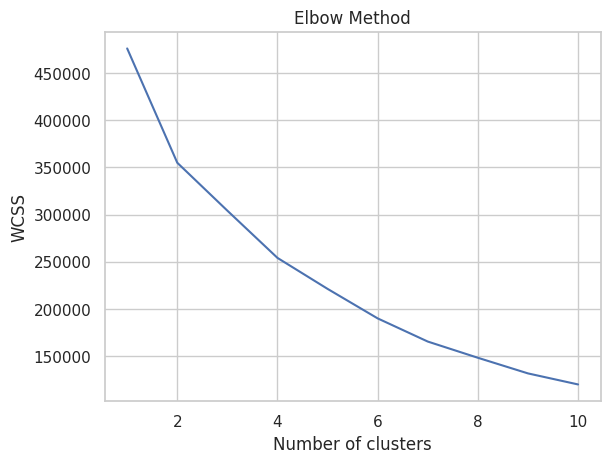

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(consensus_records)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

print("Stock Clusters:")
print(clusters)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



The resulting plot allows us to observe any inherent clusters or groupings of stocks based on their feature similarities. If certain stocks with similar characteristics or behaviors form distinct clusters, they appear closer to each other in the t-SNE plot, thereby enabling us to identify any underlying patterns or relationships that might exist within the stock market data. It serves as a valuable tool for exploratory data analysis and pattern recognition in complex datasets.

<ipython-input-33-31f133ee90df>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consensus_records_mean = data.groupby('stock_id').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


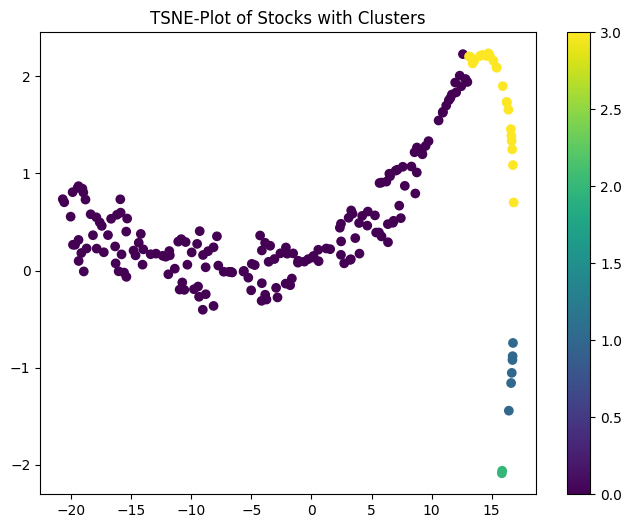

In [33]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

consensus_records_mean = data.groupby('stock_id').mean()

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(consensus_records_mean)

tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(consensus_records_mean)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('TSNE-Plot of Stocks with Clusters')
plt.colorbar()
plt.show()


### References:<br>https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/<br>https://builtin.com/data-science/tsne-python<br>https://towardsdatascience.com/t-sne-from-scratch-ft-numpy-172ee2a61df7

#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


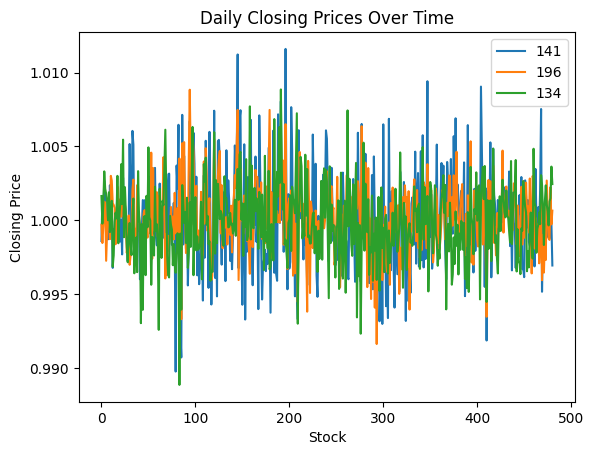

In [34]:
closing_prices = data[data['seconds_in_bucket'] == 540].set_index(['date_id', 'stock_id'])['reference_price'].unstack()

sample_stocks = np.random.choice(closing_prices.columns, 3, replace=False)
for stock in sample_stocks:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.xlabel('Stock')
plt.ylabel('Closing Price')
plt.title('Daily Closing Prices Over Time')
plt.legend()
plt.show()

In [35]:

mean_closing_prices_by_date = closing_prices.mean(axis=1)
mean_closing_prices_by_date = mean_closing_prices_by_date.reset_index()
mean_closing_prices_by_date.columns = ['date_id', 'mean_closing_price']

print(mean_closing_prices_by_date)


     date_id  mean_closing_price
0          0            1.000226
1          1            1.000402
2          2            0.999162
3          3            1.001132
4          4            1.000615
..       ...                 ...
476      476            0.998966
477      477            1.000380
478      478            1.001255
479      479            0.999401
480      480            0.999143

[481 rows x 2 columns]


In [40]:
mean_closing_prices = closing_prices.mean(axis=1)
mean_ask_prices = data.groupby(['date_id'])['ask_price'].mean()
mean_bid_prices = data.groupby(['date_id'])['bid_price'].mean()

mean_prices_df = pd.DataFrame({
    'Mean_Closing_Price': mean_closing_prices,
    'Mean_Ask_Price': mean_ask_prices,
    'Mean_Bid_Price': mean_bid_prices
})

print(mean_prices_df)


         Mean_Closing_Price  Mean_Ask_Price  Mean_Bid_Price
date_id                                                    
0                  1.000226        1.000264        0.999786
1                  1.000402        1.000428        0.999931
2                  0.999162        0.999587        0.999126
3                  1.001132        1.000927        1.000484
4                  1.000615        1.000511        1.000056
...                     ...             ...             ...
476                0.998966        0.999484        0.998986
477                1.000380        1.000646        1.000160
478                1.001255        1.001116        1.000608
479                0.999401        1.000296        0.999801
480                0.999143        0.999808        0.999337

[481 rows x 3 columns]


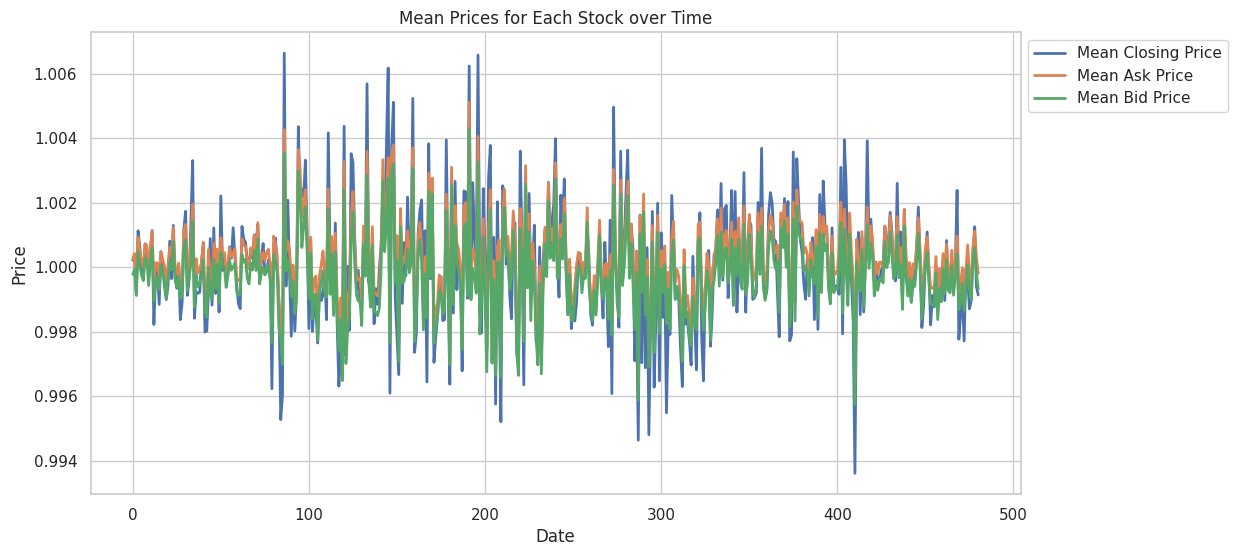

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_prices_df, x=mean_prices_df.index, y='Mean_Closing_Price', label='Mean Closing Price', linewidth=2)
sns.lineplot(data=mean_prices_df, x=mean_prices_df.index, y='Mean_Ask_Price', label='Mean Ask Price', linewidth=2)
sns.lineplot(data=mean_prices_df, x=mean_prices_df.index, y='Mean_Bid_Price', label='Mean Bid Price', linewidth=2)

plt.title('Mean Prices for Each Stock over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


From the above plot, we are able to observe that the cklosing trajectory of stocks are highly correlated with the ask price and bid price.

In [45]:
correlation_matrix = data[data['seconds_in_bucket'] == 540].pivot(index='date_id', columns='stock_id', values='reference_price').corr()
print(correlation_matrix)

stock_id       0         1         2         3         4         5    \
stock_id                                                               
0         1.000000  0.391321  0.334404  0.532219  0.396260  0.350198   
1         0.391321  1.000000  0.391354  0.333834  0.482301  0.409418   
2         0.334404  0.391354  1.000000  0.301700  0.408396  0.434093   
3         0.532219  0.333834  0.301700  1.000000  0.403812  0.370693   
4         0.396260  0.482301  0.408396  0.403812  1.000000  0.431448   
...            ...       ...       ...       ...       ...       ...   
195       0.466709  0.239684  0.305354  0.483970  0.376305  0.275119   
196       0.511869  0.371578  0.263375  0.387913  0.423120  0.458229   
197       0.211805  0.355182  0.273584  0.396253  0.388260  0.387412   
198       0.482157  0.291525  0.351641  0.587226  0.499324  0.392722   
199       0.316423  0.175641  0.103550  0.392896  0.408988  0.174664   

stock_id       6         7         8         9    ...       190

## 4b)

In [44]:
data['price_change'] = data.groupby('stock_id')['reference_price'].diff()
data['up_down_indicator'] = data['price_change'].apply(lambda x: 1 if x > 0 else 0 if x < 0 else np.nan)
data.dropna(subset=['up_down_indicator'], inplace=True)
fraction_up = data['up_down_indicator'].mean()
original_variance = data['up_down_indicator'].var()
print(f"Original Variance (X): {original_variance}")
print(f"Fraction of stocks that go up each day: {fraction_up}")

Original Variance (X): 0.24999928858231363
Fraction of stocks that go up each day: 0.49911978479460545


In [46]:
original_variance =  0.249999287454786
num_permutations = 100
def compute_variance(data):
    return np.var(data)
def simulate_permutation(data):
    permuted_data = np.random.permutation(data)
    return compute_variance(permuted_data)

results = []
for _ in range(num_permutations):
    permuted_data = data['up_down_indicator'].sample(frac=1, replace=False).reset_index(drop=True)
    permuted_variance = compute_variance(permuted_data)
    results.append(permuted_variance)

p_value = np.mean(np.array(results) > original_variance)

print(f"P-value: {p_value}")

P-value: 0.0


From the data and the permutation test, we are trying to understand if there is a significant pattern in the movement of stock prices. <br><u>Original Variance (X):</u> The original variance gives us a measure of how the fraction of stocks going up or down varies across different days. In this case, the original variance is around 0.25, indicating a substantial fluctuation in the stock market.<br><u>Fraction of stocks that go up each day: </u>The fraction of stocks that go up each day is approximately 0.50, suggesting that, on average, there's an equal probability of stocks going up or down.<br><u> A P-Value of 0: </u>A P-value of 0 indicates strong evidence against the null hypothesis. In this context, it suggests that the observed variance is highly unlikely to be the result of random chance alone. Therefore, it strongly supports the conclusion that there is a significant pattern in the movement of stock prices.

#### Q5: Best prediction model, any approaches, 25 pts


<b>Base line Model (Model 0): </b><br><br>
Used <b> Linear Regression </b> as Linear regression is a commonly used and easily interpretable statistical technique for understanding the relationship between a dependent variable and one or more independent variables.<br>
Used the sklearn.Pipeline as Pipelines allow us to chain together multiple data processing steps, such as feature scaling and model fitting into a single object. Giving us cleaner code. <br>
Used 5 fold cross validation as mentioned in the question to traina nd test the data. <br>
The <b>mean average score</b> obtained was <b>6.32</b>

In [65]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
features = ['reference_price', 'bid_price', 'ask_price', 'wap', 'imbalance_size', 'matched_size', 'bid_size', 'ask_size', 'far_price', 'near_price']
X = data[features]
y = data['target']

kf = KFold(n_splits=5, shuffle=True, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
mae_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
for i in range (5):
    print(f"Fold {i+1} MAE: {mae_scores[i]}")
average_mae = np.mean(mae_scores)
print(f"Average MAE: {average_mae}")

Fold 1 MAE: 6.314286916540895
Fold 2 MAE: 6.310519877085319
Fold 3 MAE: 6.327004359123297
Fold 4 MAE: 6.320218146640681
Fold 5 MAE: 6.33036056311988
Average MAE: 6.320477972502014


<b> Model 1:</b><br>
<b> Random Forest Regressor </b> is used. A random forest regressor is really good at handling complex relationships in data by building many decision trees and then coming to a result. <br> This quality is very helpful when navigating through stock data.<br> In order to find the best settings for this prediction, like how many 'estimators' it should use or how deep it should look into the data,<b>'GridSearch'</b> is used. <br> It helps us test lots of combinations at once. <br> The <b> Mean Absolute Error </b> for this model is <b> 6.0</b>

In [16]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

subset_size = 10000
subset_data = data.sample(n=subset_size, random_state=0)

features = ['reference_price', 'bid_price', 'ask_price', 'wap', 'imbalance_size', 'matched_size', 'bid_size', 'ask_size', 'far_price', 'near_price']
X = subset_data[features]
y = subset_data['target']

kf = KFold(n_splits=5, shuffle=True, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best negative mean absolute error:", grid_search.best_score_)



Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 50}
Best negative mean absolute error: -6.016071386617008


References: <br>
https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/<br>
https://neptune.ai/blog/select-model-for-time-series-prediction-task<br>
https://machinelearningmastery.com/normalize-standardize-time-series-data-python/<br>
https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>
https://scikit-learn.org/stable/modules/grid_search.html


#### Q6: submit model on Kaggle, 0 pts
Public Score: \5.5455
Private Score: \5.5455
Kaggle profile link: \https://www.kaggle.com/sahithyac
Screenshot(s): \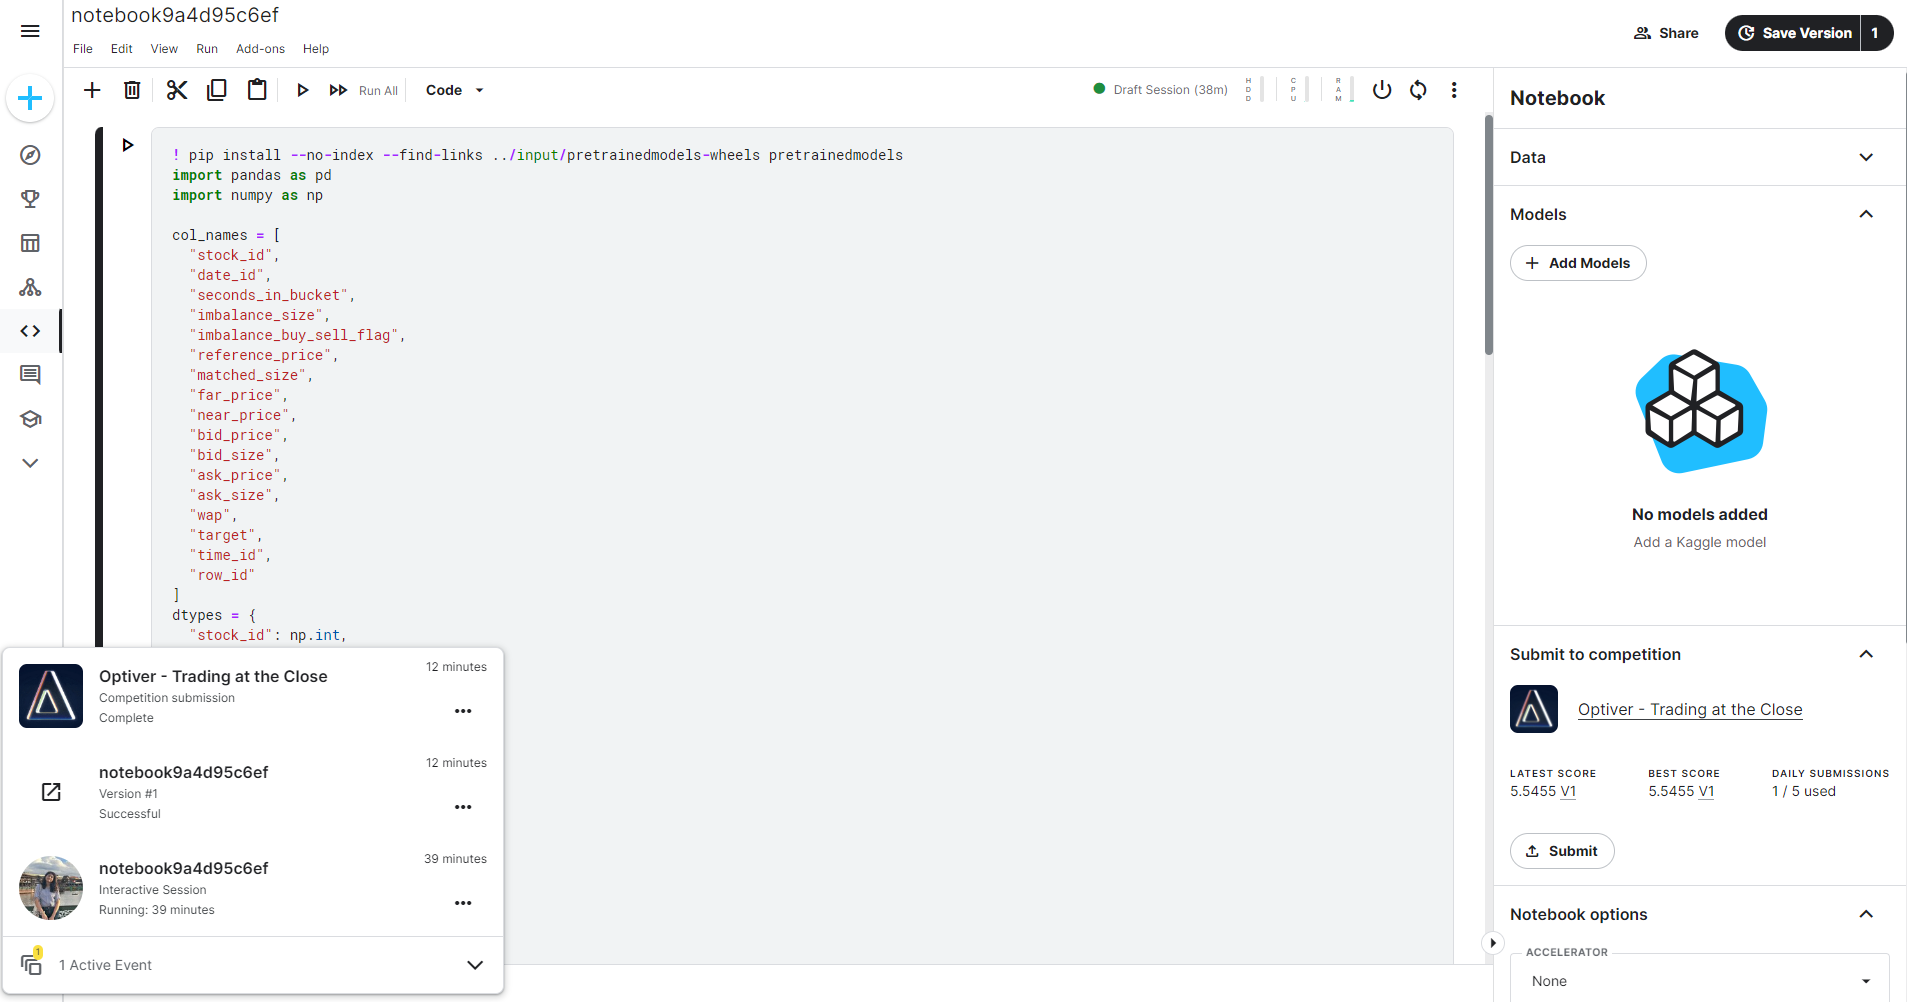
